In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tqdm import tqdm

#functions

#function that advances the system by a timestep
def timestep(list_input,L,p):
	#deal with the boundaries

	#left boundary
	if list_input[1] == 0: #if in extremal position
		list_input[0][list_input[1]] = 0 # set melted site to 0
		list_input[1] += 1 #move inward
	else:
		randomdraw1 = np.random.random_sample()
		if randomdraw1 < p: #if lands within p
			list_input[1] -= 1 #move outward
			list_input[0][list_input[1]] = 1 #set new extremal site to 1
		else: #otherwise
			list_input[0][list_input[1]] = 0 # set melted site to 0
			list_input[1] += 1 #move inward

	#right boundary
	if list_input[2] == L - 1: #if in extremal position
		list_input[0][list_input[2]] = 0 #set melted site to 0
		list_input[2] -= 1 #move inward
	else:
		randomdraw2 = np.random.random_sample()
		if randomdraw2 < p: #if lands within p
			list_input[2] += 1 #move outward
			list_input[0][list_input[2]] = 1 #set new extremal site to 1
		else: #otherwise
			list_input[0][list_input[2]] = 0 #set melted site to 0
			list_input[2] -= 1 #move in

	#screen for death
	if list_input[1] == list_input[2] or list_input[2] < list_input[1]: #if the boundaries cross
		list_input[3] = 0 #change indicator to denote that the system has died

	return(list_input)

#function that returns average of the ensemble
def average(ens,N,L):
	total = [float(0)] * L
	avg = [0] * L #so that if no systems are active it retuns an array of zeros
	for i in range(N):
		if ens[i][3] != 0:
			total = np.add(total,ens[i][0])
	avg = np.divide(total,N)
	return(avg)


#function that performs experiment for given inputs and returns a list of lists which are the y values for the average occupancy curves 
def experiment(N,L,p,tmax,eval_times):
	# make the ensemble
	#makes N systems consisting of setup, left boundary, right boundary, and indicator of death
	ensemble = [0] * N
	for i in range(N):
		ensemble[i] = [0] * 4 #scaffolding
		ensemble[i][0] = [1] * L #physical system
		ensemble[i][1] = 0 #left boundary
		ensemble[i][2] = L - 1 #right boundary
		ensemble[i][3] = 1 #death indicator
	#NOTE: the boundaries are the indexes of the most extremal REMAINING site

	#advance by timestep, handle system
	recordarray = []
	for i in tqdm(range(tmax+1)): #so that last timestep = desired plot time is included 
		for j in range(N):
			if ensemble[j][3] != 0: #if active system, advance by timestep
				ensemble[j] = timestep(ensemble[j],L,p)
		if i in eval_times: #if timestep is a desired plot step, record the state of the average system
			recordarray.append(average(ensemble,N,L))

		#print statements for troubleshooting	
		'''	
		print('ensemble')		
		for k in range(N):
			print(ensemble[k])
		print('recordarray')
		for k in range(len(recordarray)):
			print(recordarray[k])
		'''

	return(recordarray)


### PROGRAM

N = 10000
L = 81
#p different in each plot
#NOTE: p is the probability of taking an OUTWARD step
tmax = 1000
eval_times = [10,50,100,250,500,1000]

In [3]:
exp1 = experiment(N,L,.50,tmax,eval_times)

100%|██████████| 1001/1001 [00:26<00:00, 37.17it/s]


In [4]:
exp2 = experiment(N,L,.49,tmax,eval_times)

100%|██████████| 1001/1001 [00:22<00:00, 45.21it/s]


In [5]:
exp3 = experiment(N,L,.45,tmax,eval_times)

100%|██████████| 1001/1001 [00:10<00:00, 96.03it/s]


In [6]:
exp4 = experiment(N,L,.51,tmax,eval_times)

100%|██████████| 1001/1001 [00:26<00:00, 38.01it/s]


In [7]:
exp5 = experiment(N,L,.55,tmax,eval_times)

100%|██████████| 1001/1001 [00:25<00:00, 39.20it/s]


In [8]:
exp6 = experiment(N,L,.60,tmax,eval_times)

100%|██████████| 1001/1001 [00:24<00:00, 40.69it/s]


In [17]:
#4 plot version
#clean up lists

#indices for L, R boundaries start at 0 and 80 (L = 81), so for timestep = even, the walkers are at even positions, 
#and for timestep = odd, the walkers are at odd positions. All the timesteps I use are even.

#make the plots separately bc pointers
plot1 = [0] * len(eval_times)
plot2 = [0] * len(eval_times)
plot3 = [0] * len(eval_times)
plot4 = [0] * len(eval_times)


for plot in [plot1,plot2,plot3,plot4]:
    for ind in range(len(plot)):
        plot[ind] = []

arrays = [[plot1,exp1],[plot2,exp2],[plot3,exp3],[plot4,exp4]]

#extract  index elements from the experiment arrays
for plot,exp in arrays:
    for i in range(len(plot)):
        for j in range(L):
            if j % 2 == 0: #only to be used for L = odd so that first and last indices are 0 and even, respectively
                plot[i].append(exp[i][j])


In [10]:
#6 PLOT VERSION
#clean up lists

#indices for L, R boundaries start at 0 and 80 (L = 81), so for timestep = even, the walkers are at even positions, 
#and for timestep = odd, the walkers are at odd positions. All the timesteps I use are even.

#make the plots separately bc pointers
plot1 = [0] * len(eval_times)
plot2 = [0] * len(eval_times)
plot3 = [0] * len(eval_times)
plot4 = [0] * len(eval_times)
plot5 = [0] * len(eval_times)
plot6 = [0] * len(eval_times)

for plot in [plot1,plot2,plot3,plot4,plot5,plot6]:
    for ind in range(len(plot)):
        plot[ind] = []

arrays = [[plot1,exp1],[plot2,exp2],[plot3,exp3],[plot4,exp4],[plot5,exp5],[plot6,exp6]]

#extract  index elements from the experiment arrays
for plot,exp in arrays:
    for i in range(len(plot)):
        for j in range(L):
            if j % 2 == 0: #only to be used for L = odd so that first and last indices are 0 and even, respectively
                plot[i].append(exp[i][j])


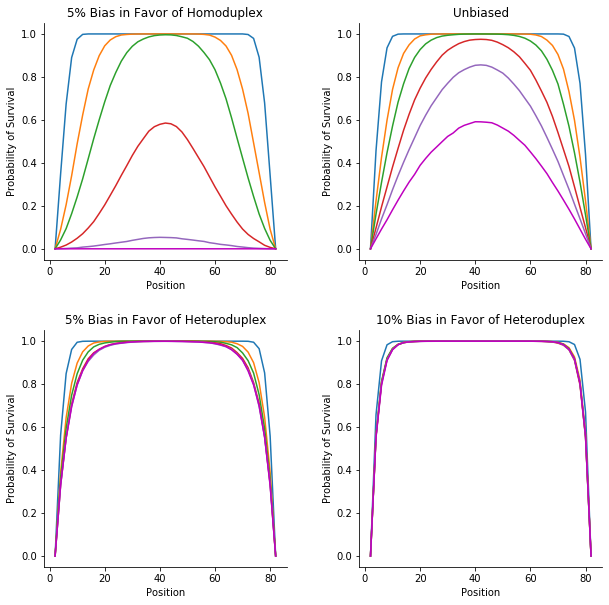

In [41]:
#plot
**titles/plots no longer correct

fignumber = 1 #(int) number by which to identify the file

x_axis = [] #x axis starts at position 1 and goes to position L
for i in range(len(plot1[0])): #arbitrary use the first curve in the first plot to get the number of y elements to accompany
	x_axis.append(i + 1)

fig, axs = plt.subplots(2, 2, figsize=(10, 10))
fig.subplots_adjust(wspace=0.3)
fig.subplots_adjust(hspace=0.3)


for i in range(len(eval_times)-1):
    axs[0, 0].plot(x_axis,plot1[i])
    axs[0, 1].plot(x_axis,plot2[i])
    axs[1, 0].plot(x_axis,plot3[i])
    axs[1, 1].plot(x_axis,plot4[i])

#to specifically make last curve magenta
axs[0, 0].plot(x_axis,plot1[-1],'m')
axs[0, 1].plot(x_axis,plot2[-1],'m')
axs[1, 0].plot(x_axis,plot3[-1],'m')
axs[1, 1].plot(x_axis,plot4[-1],'m')

for ax in axs.flat:
    ax.set(ylabel='Probability of Survival',xlabel='Position')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    #display filament length values on x axis to compensate for having cleaned out half the original y values
    ax.set(xticks=[0,10,20,30,40], xticklabels=['0','20','40','60','80'])

axs[0, 0].set_title('5% Bias in Favor of Homoduplex')
axs[0, 1].set_title('Unbiased')  
axs[1, 0].set_title('5% Bias in Favor of Heteroduplex')
axs[1, 1].set_title('10% Bias in Favor of Heteroduplex')


plt.show()
#plt.savefig('monte8figure%s-N=%i,L=%i.pdf' % (str(fignumber),N,L))


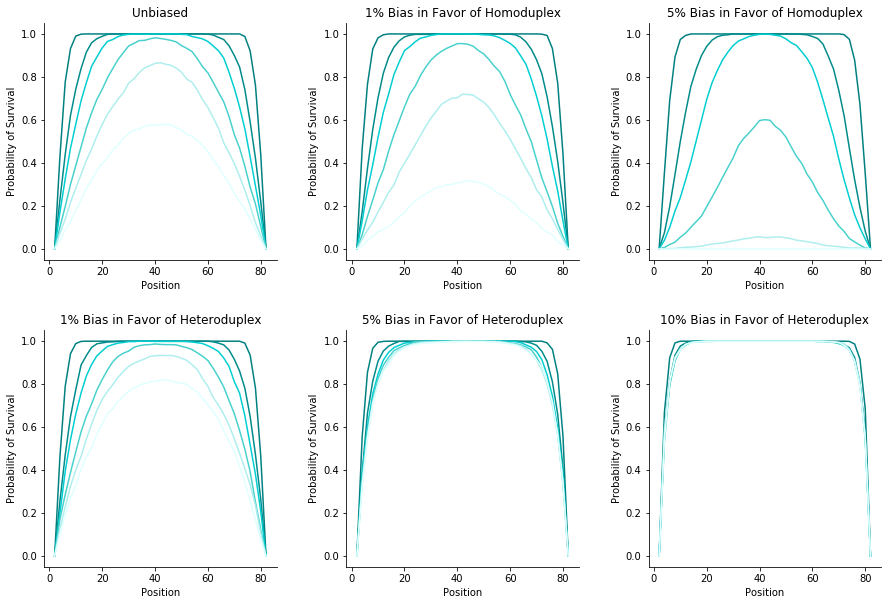

In [70]:
#6 PLOT VERSION

#plot
#NOTE: to rearrange which plot goes where, the only things that need to change are the exp1,exp2... lines and the titles

fignumber = 2 #(int) number by which to identify the file

x_axis = [] #x axis starts at position 1 and goes to position L
for i in range(len(plot1[0])): #arbitrary use the first curve in the first plot to get the number of y elements to accompany
	x_axis.append(i + 1)

fig, axs = plt.subplots(2, 3, figsize=(15, 10))
fig.subplots_adjust(wspace=0.3)
fig.subplots_adjust(hspace=0.3)

#assign positions to the experiments
colorlist = ['teal','darkcyan','darkturquoise','mediumturquoise','paleturquoise','lightcyan']
for i in range(len(eval_times)):
    axs[0, 0].plot(x_axis,plot1[i],colorlist[i])
    axs[0, 1].plot(x_axis,plot2[i],colorlist[i])
    axs[0, 2].plot(x_axis,plot3[i],colorlist[i])
    axs[1, 0].plot(x_axis,plot4[i],colorlist[i])
    axs[1, 1].plot(x_axis,plot5[i],colorlist[i])
    axs[1, 2].plot(x_axis,plot6[i],colorlist[i])
    
#titles
titlelist = [['Unbiased','1% Bias in Favor of Homoduplex','5% Bias in Favor of Homoduplex'],
             ['1% Bias in Favor of Heteroduplex','5% Bias in Favor of Heteroduplex','10% Bias in Favor of Heteroduplex']]
for i in range(2):
    for j in range(3):
        axs[i,j].set_title(titlelist[i][j])

#parameters
for ax in axs.flat:
    ax.set(ylabel='Probability of Survival',xlabel='Position')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    #display filament length values on x axis to compensate for having cleaned out half the original y values
    ax.set(xticks=[0,10,20,30,40], xticklabels=['0','20','40','60','80'])


plt.show()
#plt.savefig('monte8figure%s-N=%i,L=%i.pdf' % (str(fignumber),N,L))

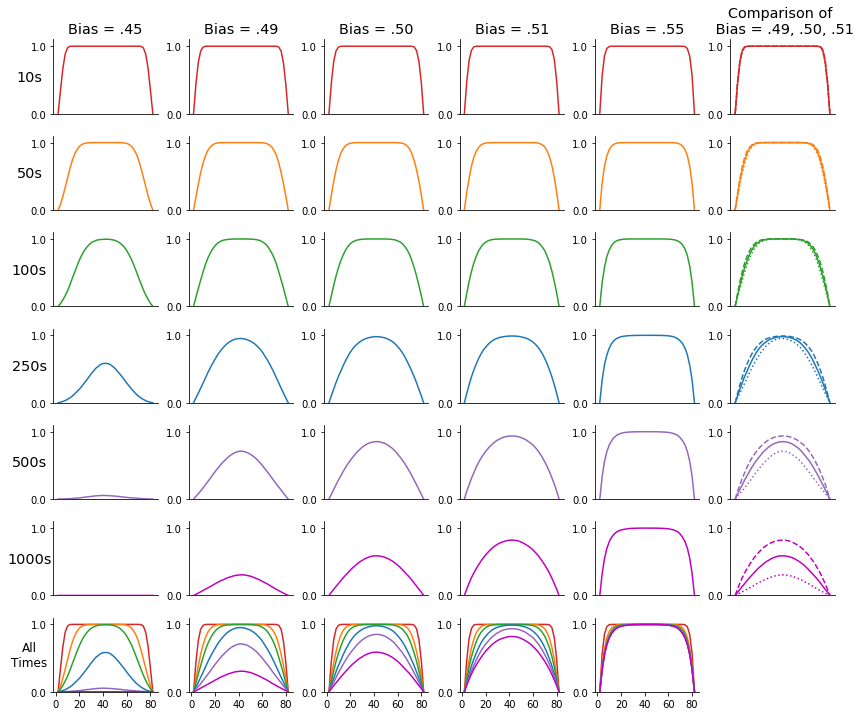

In [39]:
#42 PLOT VERSION

#plot
#NOTE: to rearrange which plot goes where, the only things that need to change are the exp1,exp2... lines and the titles

fignumber = 3 #(int) number by which to identify the file

x_axis = [] #x axis starts at position 1 and goes to position L
for i in range(len(plot1[0])): #arbitrary use the first curve in the first plot to get the number of y elements to accompany
	x_axis.append(i + 1)

fig, axs = plt.subplots(7, 6, figsize=(14, 12))
fig.subplots_adjust(wspace=0.3)
fig.subplots_adjust(hspace=0.3)

#do the columns efficiently. each column corresponds to a different 'plot' array, so these have to be done manually

#color list
colorlist = ['tab:red','tab:orange','tab:green','tab:blue','tab:purple','m']
for i in range(len(eval_times)):
    axs[i,0].plot(x_axis,plot3[i],colorlist[i])
    axs[6,0].plot(x_axis,plot3[i],colorlist[i])
    
    axs[i,1].plot(x_axis,plot2[i],colorlist[i])
    axs[6,1].plot(x_axis,plot2[i],colorlist[i])
    
    axs[i,2].plot(x_axis,plot1[i],colorlist[i])
    axs[6,2].plot(x_axis,plot1[i],colorlist[i])
    
    axs[i,3].plot(x_axis,plot4[i],colorlist[i])
    axs[6,3].plot(x_axis,plot4[i],colorlist[i])
    
    axs[i,4].plot(x_axis,plot5[i],colorlist[i])
    axs[6,4].plot(x_axis,plot5[i],colorlist[i])


for i in range(len(eval_times)):
    axs[i,5].plot(x_axis,plot1[i],colorlist[i])
    axs[i,5].plot(x_axis,plot4[i],colorlist[i],linestyle='--')
    axs[i,5].plot(x_axis,plot2[i],colorlist[i],linestyle=':')

#column titles
columntitles = ['Bias = .45','Bias = .49','Bias = .50','Bias = .51','Bias = .55','Comparison of \n Bias = .49, .50, .51']
for i in range(6):
    axs[0, i].set_title(columntitles[i],size='x-large')  

#set row titles
for i in range(len(eval_times)):
    axs[i,0].set_ylabel('%ss' % str(eval_times[i]) ,rotation=0,size='x-large')
    axs[i,0].axes.yaxis.set_label_coords(-.23,.4)
    
axs[6,0].set_ylabel('All\nTimes', rotation=0,size='large')
axs[6,0].axes.yaxis.set_label_coords(-.23,.3)
    
#universal parameters
for ax in axs.flat:
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    #display filament length values on x axis to compensate for having cleaned out half the original y values
    ax.set(xticks=[0,10,20,30,40], xticklabels=['0','20','40','60','80'])
    ax.set(yticks=[0,1], yticklabels=['0.0','1.0'])
    ax.axes.set_ylim(0,1.1)

for j in range(6): #for each column
    for i in range(6): #for all but the last row
        axs[i,j].axes.xaxis.set_visible(False)

#eliminate unused plot
axs[6,5].axes.xaxis.set_visible(False)
axs[6,5].axes.yaxis.set_visible(False)
axs[6,5].spines['left'].set_visible(False)
axs[6,5].spines['bottom'].set_visible(False)

        

plt.show()
#plt.savefig('monte8figure%s-N=%i,L=%i.pdf' % (str(fignumber),N,L))


In [38]:
#trying to write data to excel for Mara May 5
from openpyxl import Workbook

wb = Workbook()

ws = wb.active

for plot in [plot3,plot2,plot1,plot4,plot5]:
    for array in plot:
        ws.append(array)

        
wb.save(filename='Data_for_Mara_May5_N=10000.xlsx')